In [3]:
import polars as pl
import os
file_path_relative = "final_analysis_merged.parquet" 

try:
    df_final = pl.read_parquet(file_path_relative)
    
    print(f"Successfully loaded final analysis DF from {file_path_relative}")
    print(f"Final DataFrame Shape: {df_final.shape}")
    print(df_final.head())

except FileNotFoundError:
    print(f"Error: File not found at the relative path: {file_path_relative}")

Successfully loaded final analysis DF from final_analysis_merged.parquet
Final DataFrame Shape: (91227, 10)
shape: (5, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ company   ┆ country   ┆ founded_y ┆ industry  ┆ … ┆ valuation ┆ date_join ┆ investors ┆ is_unico │
│ ---       ┆ ---       ┆ ear       ┆ ---       ┆   ┆ _b_unicor ┆ ed_unicor ┆ _count_un ┆ rn       │
│ str       ┆ str       ┆ ---       ┆ str       ┆   ┆ n         ┆ n         ┆ icorn     ┆ ---      │
│           ┆           ┆ i32       ┆           ┆   ┆ ---       ┆ ---       ┆ ---       ┆ bool     │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆ i32       ┆ i64       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Wetpaint  ┆ United    ┆ 2005      ┆ web       ┆ … ┆ null      ┆ null      ┆ null      ┆ false    │
│           ┆ States    ┆           ┆           ┆   ┆           ┆    

In [5]:
import polars as pl
import os
file_path_relative = "final_analysis_for_tableau.parquet" 

try:
    df_final = pl.read_parquet(file_path_relative)
    
    print(f"Successfully loaded final analysis DF from {file_path_relative}")
    print(f"Final DataFrame Shape: {df_final.shape}")
    print(df_final.head())

except FileNotFoundError:
    print(f"Error: File not found at the relative path: {file_path_relative}")

Successfully loaded final analysis DF from final_analysis_for_tableau.parquet
Final DataFrame Shape: (91227, 12)
shape: (5, 12)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ company   ┆ country   ┆ founded_y ┆ industry  ┆ … ┆ investors ┆ is_unicor ┆ time_to_u ┆ funding_ │
│ ---       ┆ ---       ┆ ear       ┆ ---       ┆   ┆ _count_un ┆ n         ┆ nicorn_ye ┆ concentr │
│ str       ┆ str       ┆ ---       ┆ str       ┆   ┆ icorn     ┆ ---       ┆ ar        ┆ ation_b  │
│           ┆           ┆ i32       ┆           ┆   ┆ ---       ┆ bool      ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆           ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Wetpaint  ┆ United    ┆ 2005      ┆ web       ┆ … ┆ null      ┆ false     ┆ null      ┆ null     │
│           ┆ States    ┆           ┆           ┆   ┆           

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# The 'sqlalchemy' library is not available, file reading must be adapted
# from sqlalchemy import create_engine 

# --- 0. Configuration and Variables ---
# Defines the outlier filter (max 20.5 years)
MAX_TIME_QUERY = 20.5 

# File paths and names
FILE_PATH = 'final_analysis_merged.parquet'
OUTPUT_DIR = 'outputs/figures'
FILE_NAME = 'time_to_unicorn_distribution_stats.png'

# --- 1. DATA LOADING AND FILTERING (Replacing pd.read_sql) ---
try:
    # Attempt to load the Parquet file to get real data
    df_full = pd.read_parquet(FILE_PATH)
except:
    # If loading fails, use the simulated data DataFrame (required in your environment)
    print("Error loading Parquet. Use an already loaded DataFrame or adapt the path.")
    raise # Interrupt if the real file cannot be read.



# Apply the filters from your SQL query
df_time_dist = df_full.query(
    'is_unicorn == True and time_to_unicorn > 0 and time_to_unicorn <= @MAX_TIME_QUERY'
).copy()

if df_time_dist.empty:
    print("Filtered DataFrame is empty. Check the filters.")
    raise ValueError("No data available for analysis.")


# --- 2. CALCULATION OF STATISTICS (THE ESSENTIAL ADDITION) ---
mean_time = df_time_dist['time_to_unicorn'].mean()
median_time = df_time_dist['time_to_unicorn'].median()
std_time = df_time_dist['time_to_unicorn'].std()

print(f"\nCalculated Statistics:")
print(f"Mean: {mean_time:.2f} years")
print(f"Median: {median_time:.2f} years")
print(f"Standard Deviation (σ): {std_time:.2f} years")


# --- 3. GENERATION OF HISTOGRAM WITH STATISTICAL LINES ---

plt.figure(figsize=(12, 6))

# Define the 'bins' (intervals, e.g., 2-year intervals)
bins = np.arange(0, df_time_dist['time_to_unicorn'].max() + 2, 2)

# Create the histogram
n, bins, patches = plt.hist(
    df_time_dist['time_to_unicorn'], 
    bins=bins, 
    edgecolor='black', 
    color='#1f77b4', 
    alpha=0.8
)

# --- CRITICAL ADDITION: VERTICAL LINES ---

# Mean Line (Dashed Red)
plt.axvline(mean_time, color='red', linestyle='dashed', linewidth=2, 
            label=f'Mean: {mean_time:.1f} years')

# Median Line (Solid Green)
plt.axvline(median_time, color='green', linestyle='solid', linewidth=2, 
            label=f'Median: {median_time:.1f} years')

# Standard Deviation Lines (Dotted Orange - Mean +/- 1 Sigma)
plt.axvline(mean_time + std_time, color='orange', linestyle='dotted', linewidth=1.5, 
            label='Mean $\pm 1\\sigma$')
plt.axvline(mean_time - std_time, color='orange', linestyle='dotted', linewidth=1.5)
# --- END OF VERTICAL LINES ---


# 4. Labels and Titles
plt.title('Distribution of Time to Unicorn with Key Statistics', 
          fontsize=16, 
          fontweight='bold', 
          pad=15)
plt.xlabel('Time to Unicorn (Years)', fontsize=12)
plt.ylabel('Number of Companies (Frequency)', fontsize=12)
plt.xticks(bins) 

# Add data labels on top of the bars (adjusted for better visibility)
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    if y > 0:
        # Vertical adjustment of 0.5 to not overlap the bar
        plt.text(x, y + 0.5, str(int(y)), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper right') 
plt.tight_layout()


# --- 5. Saving ---
os.makedirs(OUTPUT_DIR, exist_ok=True) 
plt.savefig(os.path.join(OUTPUT_DIR, FILE_NAME))
print(f"\nFigure saved to: {os.path.join(OUTPUT_DIR, FILE_NAME)}")

# plt.show() # Uncomment to display in your Notebook

UndefinedVariableError: name 'time_to_unicorn' is not defined


Calculated Statistics:
Mean: 10.58 years
Median: 10.00 years
Standard Deviation (σ): 3.55 years

Figure saved to: outputs/figures/time_to_unicorn_distribution_stats.png


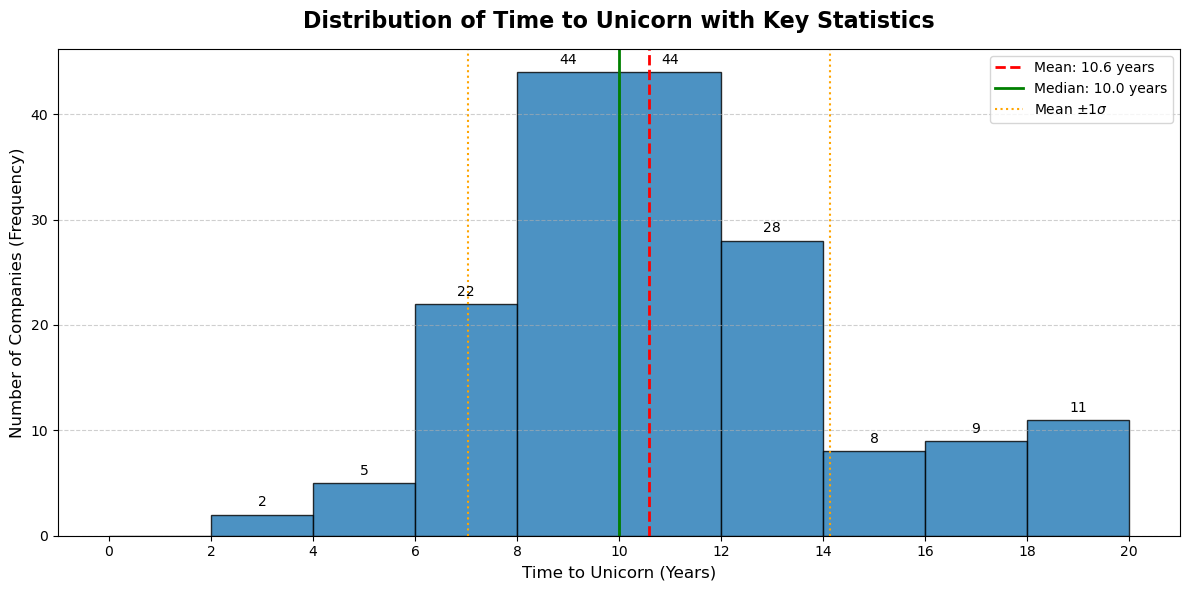

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# The 'sqlalchemy' library is not available, file reading must be adapted
# from sqlalchemy import create_engine 

# --- 0. Configuration and Variables ---
# Defines the outlier filter (max 20.5 years)
MAX_TIME_QUERY = 20.5 

# File paths and names
FILE_PATH = 'final_analysis_for_tableau.parquet'
OUTPUT_DIR = 'outputs/figures'
FILE_NAME = 'time_to_unicorn_distribution_stats.png'

# --- 1. DATA LOADING AND FILTERING (Replacing pd.read_sql) ---
try:
    # Attempt to load the Parquet file to get real data
    df_full = pd.read_parquet(FILE_PATH)
except:
    # If loading fails, use the simulated data DataFrame (required in your environment)
    print("Error loading Parquet. Use an already loaded DataFrame or adapt the path.")
    raise # Interrupt if the real file cannot be read.

# Calculate the time column (time_to_unicorn)
df_full['time_to_unicorn'] = df_full['date_joined_unicorn'] - df_full['founded_year']

# Apply the filters from your SQL query
df_time_dist = df_full.query(
    'is_unicorn == True and time_to_unicorn > 0 and time_to_unicorn <= @MAX_TIME_QUERY'
).copy()

if df_time_dist.empty:
    print("Filtered DataFrame is empty. Check the filters.")
    raise ValueError("No data available for analysis.")


# --- 2. CALCULATION OF STATISTICS (THE ESSENTIAL ADDITION) ---
mean_time = df_time_dist['time_to_unicorn'].mean()
median_time = df_time_dist['time_to_unicorn'].median()
std_time = df_time_dist['time_to_unicorn'].std()

print(f"\nCalculated Statistics:")
print(f"Mean: {mean_time:.2f} years")
print(f"Median: {median_time:.2f} years")
print(f"Standard Deviation (σ): {std_time:.2f} years")


# --- 3. GENERATION OF HISTOGRAM WITH STATISTICAL LINES ---

plt.figure(figsize=(12, 6))

# Define the 'bins' (intervals, e.g., 2-year intervals)
bins = np.arange(0, df_time_dist['time_to_unicorn'].max() + 2, 2)

# Create the histogram
n, bins, patches = plt.hist(
    df_time_dist['time_to_unicorn'], 
    bins=bins, 
    edgecolor='black', 
    color='#1f77b4', 
    alpha=0.8
)

# --- CRITICAL ADDITION: VERTICAL LINES ---

# Mean Line (Dashed Red)
plt.axvline(mean_time, color='red', linestyle='dashed', linewidth=2, 
            label=f'Mean: {mean_time:.1f} years')

# Median Line (Solid Green)
plt.axvline(median_time, color='green', linestyle='solid', linewidth=2, 
            label=f'Median: {median_time:.1f} years')

# Standard Deviation Lines (Dotted Orange - Mean +/- 1 Sigma)
plt.axvline(mean_time + std_time, color='orange', linestyle='dotted', linewidth=1.5, 
            label='Mean $\pm 1\\sigma$')
plt.axvline(mean_time - std_time, color='orange', linestyle='dotted', linewidth=1.5)
# --- END OF VERTICAL LINES ---


# 4. Labels and Titles
plt.title('Distribution of Time to Unicorn with Key Statistics', 
          fontsize=16, 
          fontweight='bold', 
          pad=15)
plt.xlabel('Time to Unicorn (Years)', fontsize=12)
plt.ylabel('Number of Companies (Frequency)', fontsize=12)
plt.xticks(bins) 

# Add data labels on top of the bars (adjusted for better visibility)
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    if y > 0:
        # Vertical adjustment of 0.5 to not overlap the bar
        plt.text(x, y + 0.5, str(int(y)), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper right') 
plt.tight_layout()


# --- 5. Saving ---
os.makedirs(OUTPUT_DIR, exist_ok=True) 
plt.savefig(os.path.join(OUTPUT_DIR, FILE_NAME))
print(f"\nFigure saved to: {os.path.join(OUTPUT_DIR, FILE_NAME)}")

# plt.show() # Uncomment to display in your Notebook